![lihtc](https://camo.githubusercontent.com/af8ed0a0f65baaa8c90afabbd29e8b1fbc19b48fcf63b86028d5143a0d22acb9/68747470733a2f2f7777772e696864612e6f72672f77702d636f6e74656e742f75706c6f6164732f323031352f30382f494844412d4c6f772d496e636f6d652d5461782d4372656469742d30322d332e6a7067)

# What is the Low Income Housing Tax Credit?

#### Sources:

- [Wikipedia article](https://en.wikipedia.org/wiki/Low-Income_Housing_Tax_Credit)
- [Tax Reform Act of 1986](https://en.wikipedia.org/wiki/Tax_Reform_Act_of_1986)
- [NYT - Opinion: A Tax Credit Worth Preserving](https://www.nytimes.com/2012/12/21/opinion/a-tax-credit-worth-preserving.html?_r=0)
- [Tax Policy Center: What is the Low-Income Housing Tax Credit and how does it work?](https://www.taxpolicycenter.org/briefing-book/what-low-income-housing-tax-credit-and-how-does-it-work)
- [Office Of Policy Development And Research (PD&R): Low-Income Housing Tax Credit LIHTC](https://www.huduser.gov/PORTAL/datasets/lihtc.html)
- [Urban Institute: The Low-Income Housing Tax Credit](https://www.urban.org/sites/default/files/publication/98761/lithc_past_achievements_future_challenges_final_0.pdf)
- [Omnibus Consolidations Appropriations Act of 2018](https://en.wikipedia.org/wiki/Consolidated_Appropriations_Act,_2018)
- [Senate Bill 548](https://www.congress.gov/bill/115th-congress/senate-bill/548)

As the maximum rent that can be charged is based upon the Area Median Income ("AMI"), LIHTC housing remains unaffordable to many low-income (<30% AMI) renters.

The tax credits are more attractive than tax deductions as the credits provide a dollar-for-dollar reduction in a taxpayers federal income tax, whereas a tax deduction only provides a reduction in taxable income.

How it works

The LIHTC provides funding for the development costs of low-income housing by allowing an investor (usually the partners of a partnership that owns the housing) to take a federal tax credit equal to a percentage (either 4% or 9%, for 10 years, depending on the credit type) of the cost incurred for development of the low-income units in a rental housing project.

To take advantage of the LIHTC, a developer will either (i) propose a project to a state agency, seek and win a competitive allocation of tax credits, or (ii) obtain approval and issuance of tax-exempt bonds to finance at least 50% of project cost, and then complete the project, certify its cost, and rent-up the project to low income tenants. Simultaneously, an investor will be found that will make a capital contribution to the partnership or limited liability company that owns the project in exchange for being allocated the entity's LIHTCs over a ten-year period. The amount of the credit will be based on (i) the amount of credits awarded to the project in the competition, (ii) the actual cost of the project, (iii) the tax credit rate announced by the IRS, and (iv) the percentage of the project's units that are rented to low-income tenants. Failure to comply with the applicable rules, or a sale of the project or an ownership interest before the end of at least a 15-year period, can lead to recapture of credits previously taken, as well as the inability to take future credits. These rules are described in greater detail below.

### What is the objective of this project? 

The objective for this project is to explore the LIHTC dataset, get a better understanding of the program, and build a regressor to predict what the allocated amount for a project ought to be based off of various features in the dataset.

We also might build a classifier to determine if a particular project qualifies for certain binary criteria. This depends on the quality of the data.



### How should the problem be framed? 

We should use a regression algorithm as we are looking to predict whether amount allocated to a particular area.

# Initialize Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load data

In [2]:
pd.set_option('display.max_rows', 20)

In [3]:
pathname = '/Users/blakenicholson/Documents/Personal/Coding/DataAnalysis-LIHTC/LIHTCPUB.CSV'

In [4]:
df = pd.read_csv(pathname, low_memory=False)

In [5]:
df.shape

(49449, 75)

In [6]:
df.columns

Index(['hud_id', 'project', 'proj_add', 'proj_cty', 'proj_st', 'proj_zip',
       'state_id', 'latitude', 'longitude', 'place1990', 'place2000',
       'place2010', 'fips1990', 'fips2000', 'fips2010', 'st2010', 'cnty2010',
       'scattered_site_cd', 'resyndication_cd', 'allocamt', 'n_units',
       'li_units', 'n_0br', 'n_1br', 'n_2br', 'n_3br', 'n_4br', 'inc_ceil',
       'low_ceil', 'ceilunit', 'yr_pis', 'yr_alloc', 'non_prof', 'basis',
       'bond', 'mff_ra', 'fmha_514', 'fmha_515', 'fmha_538', 'home',
       'home_amt', 'tcap', 'tcap_amt', 'cdbg', 'cdbg_amt', 'htf', 'htf_amt',
       'fha', 'hopevi', 'hpvi_amt', 'tcep', 'tcep_amt', 'rad', 'qozf',
       'qozf_amt', 'rentassist', 'trgt_pop', 'trgt_fam', 'trgt_eld',
       'trgt_dis', 'trgt_hml', 'trgt_other', 'trgt_spc', 'type', 'credit',
       'n_unitsr', 'li_unitr', 'metro', 'dda', 'qct', 'nonprog', 'nlm_reason',
       'nlm_spc', 'datanote', 'record_stat'],
      dtype='object')

Let's check out the first few rows.

In [7]:
df.head()

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,...,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason,nlm_spc,datanote,record_stat
0,AKA0000X003,EAGLE RIDGE TOWNHOMES,1775 NORTH THUMA,PALMER,AK,99645,AK-05-23,61.587872,-149.099777,NaN,...,33.0,33.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,X
1,AKA0000X018,"GATEWAY-SEWARD ASSOCIATES, LTD PTN",1810 PHOENIX ROAD,SEWARD,AK,99664,AK-99-99,60.125469,-149.446060,NaN,...,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
2,AKA0000X022,"JUNEAU AFFORDABLE RENTALS, LLC",SCATTERED SITE,JUNEAU,AK,99801,AK-99-99,58.383499,-134.437698,NaN,...,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
3,AKA0000X024,"MILL BAY TOWNHOMES, LLC",1223 MILL BAY ROAD,KODIAK,AK,99615,AK-99-99,57.796478,-152.392319,NaN,...,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
4,AKA0000X030,TURNAGAIN PLACE APTS,2708 COHO WAY,ANCHORAGE,AK,99517,AK-99-99,61.205101,-149.930298,NaN,...,29.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U


In [8]:
df[0:4].T

,0,1,2,3
hud_id,AKA0000X003,AKA0000X018,AKA0000X022,AKA0000X024
project,EAGLE RIDGE TOWNHOMES,"GATEWAY-SEWARD ASSOCIATES, LTD PTN","JUNEAU AFFORDABLE RENTALS, LLC","MILL BAY TOWNHOMES, LLC"
proj_add,1775 NORTH THUMA,1810 PHOENIX ROAD,SCATTERED SITE,1223 MILL BAY ROAD
proj_cty,PALMER,SEWARD,JUNEAU,KODIAK
proj_st,AK,AK,AK,AK
...,...,...,...,...
nonprog,NaN,NaN,NaN,NaN
nlm_reason,NaN,NaN,NaN,NaN
nlm_spc,NaN,NaN,NaN,NaN
datanote,NaN,NaN,NaN,NaN


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,47036.0,38.240306,4.975487,0.000000,34.811197,39.006252,41.532846,64.851646
longitude,47036.0,-90.888845,16.423087,-166.780594,-96.936663,-86.884270,-78.865175,170.220001
place1990,31804.0,1716.430135,1490.025700,3.000000,680.000000,1305.000000,2495.000000,9070.000000
place2000,38851.0,39167.335152,23037.168723,100.000000,19000.000000,40000.000000,56320.000000,89150.000000
place2010,46949.0,45958.198194,26780.984817,100.000000,23290.000000,47610.000000,64260.000000,99999.000000
...,...,...,...,...,...,...,...,...
metro,48585.0,1.234805,0.535527,0.000000,1.000000,1.000000,1.000000,3.000000
dda,16061.0,0.354399,0.733675,0.000000,0.000000,0.000000,0.000000,4.000000
qct,43671.0,1.788372,0.408467,1.000000,2.000000,2.000000,2.000000,2.000000
nonprog,8460.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49449 entries, 0 to 49448
Data columns (total 75 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hud_id             49449 non-null  object 
 1   project            49448 non-null  object 
 2   proj_add           48465 non-null  object 
 3   proj_cty           49409 non-null  object 
 4   proj_st            49449 non-null  object 
 5   proj_zip           46333 non-null  object 
 6   state_id           48864 non-null  object 
 7   latitude           47036 non-null  float64
 8   longitude          47036 non-null  float64
 9   place1990          31804 non-null  float64
 10  place2000          38851 non-null  float64
 11  place2010          46949 non-null  float64
 12  fips1990           49449 non-null  object 
 13  fips2000           49449 non-null  object 
 14  fips2010           49449 non-null  object 
 15  st2010             49449 non-null  int64  
 16  cnty2010           470

# Data Exploration

- Variable Identification
- Univariate Analysis
- Bi-variate Analysis
- Missing values treatment
- Outlier treatment
- Variable transformation
- Variable creation

# Data Cleaning

using data dictionary found here: https://github.com/bnicholson206/DataAnalysis-LIHTC/blob/main/LIHTC%20Data%20Dictionary%202019.pdf

We have a fair amount of NaN values in the dataset.

In [11]:
df.isnull().any()

hud_id         False
project         True
proj_add        True
proj_cty        True
proj_st        False
               ...  
nonprog         True
nlm_reason      True
nlm_spc         True
datanote        True
record_stat    False
Length: 75, dtype: bool

First, identify Predictor (Input) and Target (output) variables. Next, identify the data type and category of the variables.

Predictors = All Columns

Target = Allocamt

Convert all floats to Integers

In [12]:
df_num = df.select_dtypes(include='float')
# df_num.drop(columns=['latitude','longitude'])

In [13]:
df_num.head()

,latitude,longitude,place1990,place2000,place2010,cnty2010,scattered_site_cd,resyndication_cd,allocamt,n_units,...,trgt_other,type,credit,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason
0,61.587872,-149.099777,NaN,NaN,58660.0,170.0,NaN,NaN,NaN,33.0,...,NaN,NaN,NaN,33.0,33.0,1.0,NaN,NaN,NaN,NaN
1,60.125469,-149.446060,NaN,NaN,68560.0,122.0,NaN,NaN,NaN,20.0,...,NaN,NaN,1.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN
2,58.383499,-134.437698,NaN,NaN,36400.0,110.0,1.0,2.0,NaN,25.0,...,NaN,1.0,NaN,25.0,25.0,NaN,NaN,NaN,NaN,NaN
3,57.796478,-152.392319,NaN,NaN,40950.0,150.0,NaN,NaN,NaN,20.0,...,NaN,NaN,2.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN
4,61.205101,-149.930298,NaN,NaN,3000.0,20.0,NaN,NaN,NaN,29.0,...,NaN,NaN,2.0,29.0,29.0,NaN,NaN,NaN,NaN,NaN


#### Fill in NaN values

In [14]:
# fill all NaN values and change data type to 'int'

df[df_num.columns] = df[df_num.columns].fillna(0)
df[df_num.columns] = df[df_num.columns].astype('int')

#### Convert all discrete numbers into discrete categories

In [15]:
# convert all discrete numbers into discrete categories

def scattered_site_cd_numttocat(number): # Scattered Sity Property
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def resyndication_cd_numttocat(number): # Resyndicated Property
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def Non_Profit_numttocat(number): # Non profit sponsor
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def nonprog_numttocat(number): # Non profit sponsor
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    else:
        return 'No'
    
def Basis_Profit_numttocat(number): # Increase in eligible basis
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def Bond_Profit_numttocat(number): # Tax-exempt bond received
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def Home_numttocat(number): # HOME Investment Partnership Program Funds
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def Mrr_ra_Profit_numttocat(number): # HUD Multi-Family financial/rental assistance
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def fmha_514_numttocat(number): # FmHA (RHS) Section 514 Loan
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def fmha_515_numttocat(number): # FmHA (RHS) Section 515 Loan
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def fmha_538_numttocat(number): # FmHA (RHS) Section 515 Loan
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def rad_numttocat(number): # Housing Trust Fund funds
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def htf_numttocat(number): # Housing Trust Fund funds
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def hopevi_numttocat(number): # Forms part of a HOPEVI development
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def tcep_numttocat(number): # Tax Credit Exchange Program (TCEP) funds
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def tcap_numttocat(number): # Tax Credit Assistance Program (TCEP) funds
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def fha_numttocat(number): #FHA-insured loan
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def cdbg_numttocat(number): # community development block grant (CDBG) funds
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def inc_ceil_numttocat(number): #Elected Rent/income ceiling for low income units
    if number is 1:
        return '50% AMGI'
    elif number is 2:
        return '60% AMGI'
    elif number is 3:
        return 'Not Reported'
    
def Low_ceil_numttocat(number): # Units set aside with rents lower than elected rent/income ceiling
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def record_stat_numttocat(number): # Units set aside with rents lower than elected rent/income ceiling
    if number is 'N':
        return 'New'
    elif number is 'U':
        return 'Updated'
    elif number is 'X':
        return 'Existing'
    
def Rentassist_stat_numttocat(number): # Federal or state project-based rental assistance contract
    if number is 1:
        return 'Federal'
    elif number is 2:
        return 'State'
    elif number is 3:
        return 'Both State and Federal'
    elif number is 4:
        return 'Neither'
    elif number is 5:
        return 'Unknown'
    
def Type_numttocat(number): # Federal or state project-based rental assistance contract
    if number is 1:
        return 'New Construction'
    elif number is 2:
        return 'Acquisition and Rehab'
    elif number is 3:
        return 'Both new construction and A/R'
    elif number is 4:
        return 'Existing'
    
def Credit_numttocat(number): # Type of credit percentage
    if number is 1:
        return '30% present value'
    elif number is 2:
        return '70% present value'
    elif number is 3:
        return 'Both'
    elif number is 4:
        return 'TCEP Only'
    
def dda_numttocat(number): # Is the census tract in a difficult development area?
    if number is 0:
        return 'Not in DDA'
    elif number is 1:
        return 'In Metro DDA'
    elif number is 2:
        return 'In Non-Metro DDA'
    elif number is 3:
        return 'In Metro GO Zone DDA'
    elif number is 4:
        return 'In Non-Metro GO Zone DDA'
    
def metro_numttocat(number): # Is the census tract metro or non-metro at the time the property was placed into service?
    if number is 1:
        return 'Metro/Non-Central City'
    elif number is 2:
        return 'Metro/Central City'
    elif number is 3:
        return 'Non-Metro'
    
def nlm_reason_numttocat(number): # Reason property is no longer monitored for LIHTC
    if number is 1:
        return 'Completed Extended-Use Period'
    elif number is 2:
        return 'Sale under Qualified Contract'
    elif number is 3:
        return 'Other'
    
def qct_numttocat(number): # Is the census tract a qualified census tract?
    if number is 1:
        return 'In a Qualified Census Tract'
    elif number is 2:
        return 'Not In a Qualified Census Tract'
    
def qozf_numttocat(number): # Qualified Opportunity Zone Fund
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def trgt_pop_numttocat(number): # Targets a specific population with specified services or facilities
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def trgt_fam_numttocat(number): # Targets a specific population - families
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def trgt_eld_numttocat(number): # Targets a specific population - elderly
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def trgt_dis_numttocat(number): # Targets a specific population - disabled
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def trgt_hml_numttocat(number): # Targets a specific population - homeless
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def trgt_other_numttocat(number): # Targets a specific population - other
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'

In [16]:
df["scattered_site_cd"] = df["scattered_site_cd"].map(scattered_site_cd_numttocat)
df["resyndication_cd"] = df["resyndication_cd"].map(resyndication_cd_numttocat)
df["inc_ceil"] = df["inc_ceil"].map(inc_ceil_numttocat)
df["low_ceil"] = df["low_ceil"].map(Low_ceil_numttocat)
df["record_stat"] = df["record_stat"].map(record_stat_numttocat)
df["non_prof"] = df["non_prof"].map(Non_Profit_numttocat)
df["basis"] = df["basis"].map(Basis_Profit_numttocat)
df["bond"] = df["bond"].map(Bond_Profit_numttocat)
df["mff_ra"] = df["mff_ra"].map(Mrr_ra_Profit_numttocat)
df["fmha_514"] = df["fmha_514"].map(fmha_514_numttocat)
df["fmha_515"] = df["fmha_515"].map(fmha_515_numttocat)
df["fmha_538"] = df["fmha_538"].map(fmha_538_numttocat)
df["home"] = df["home"].map(Home_numttocat)
df["rentassist"] = df["rentassist"].map(Rentassist_stat_numttocat)
df["type"] = df["type"].map(Type_numttocat)
df["credit"] = df["credit"].map(Credit_numttocat)
df["dda"] = df["dda"].map(dda_numttocat)
df["metro"] = df["metro"].map(metro_numttocat)
df["nlm_reason"] = df["nlm_reason"].map(nlm_reason_numttocat)
df["tcap"] = df["tcap"].map(tcap_numttocat)
df["cdbg"] = df["cdbg"].map(cdbg_numttocat)
df["htf"] = df["htf"].map(htf_numttocat)
df["hopevi"] = df["hopevi"].map(hopevi_numttocat)
df["fha"] = df["fha"].map(fha_numttocat)
df["tcep"] = df["tcep"].map(tcep_numttocat)
df["rad"] = df["rad"].map(rad_numttocat)
df["nonprog"] = df["nonprog"].map(nonprog_numttocat)
df["qct"] = df["qct"].map(qct_numttocat)
df["qozf"] = df["qozf"].map(qozf_numttocat)
df["trgt_pop"] = df["trgt_pop"].map(trgt_pop_numttocat)
df["trgt_fam"] = df["trgt_fam"].map(trgt_fam_numttocat)
df["trgt_eld"] = df["trgt_eld"].map(trgt_eld_numttocat)
df["trgt_hml"] = df["trgt_hml"].map(trgt_hml_numttocat)
df["trgt_dis"] = df["trgt_dis"].map(trgt_hml_numttocat)
df["trgt_other"] = df["trgt_other"].map(trgt_other_numttocat)

In [17]:
df.to_csv("LIHTCPUB_cleaned.csv", index_label="ID")

In [18]:
df.head()

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,...,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason,nlm_spc,datanote,record_stat
0,AKA0000X003,EAGLE RIDGE TOWNHOMES,1775 NORTH THUMA,PALMER,AK,99645,AK-05-23,61,-149,0,...,33,33,Metro/Non-Central City,Not in DDA,None,No,None,NaN,NaN,Existing
1,AKA0000X018,"GATEWAY-SEWARD ASSOCIATES, LTD PTN",1810 PHOENIX ROAD,SEWARD,AK,99664,AK-99-99,60,-149,0,...,20,20,None,Not in DDA,None,No,None,NaN,NaN,Existing
2,AKA0000X022,"JUNEAU AFFORDABLE RENTALS, LLC",SCATTERED SITE,JUNEAU,AK,99801,AK-99-99,58,-134,0,...,25,25,None,Not in DDA,None,No,None,NaN,NaN,Updated
3,AKA0000X024,"MILL BAY TOWNHOMES, LLC",1223 MILL BAY ROAD,KODIAK,AK,99615,AK-99-99,57,-152,0,...,20,20,None,Not in DDA,None,No,None,NaN,NaN,Existing
4,AKA0000X030,TURNAGAIN PLACE APTS,2708 COHO WAY,ANCHORAGE,AK,99517,AK-99-99,61,-149,0,...,29,29,None,Not in DDA,None,No,None,NaN,NaN,Updated


# Feature Engineering

In [19]:
# try:
#   df['ratio_of_li_units'] = df['li_units'] / df['n_units'] 
# except ZeroDivisionError:
#   df['ratio_of_li_units'] = 0

In [20]:

# try:
#   df['ratio_of_0br_units'] = df['n_0br'] / df['n_units'] 
# except ZeroDivisionError:
#   df['ratio_of_0br_units'] = 0

# try:
#   df['ratio_of_1br_units'] = df['n_1br'] / df['n_units'] 
# except ZeroDivisionError:
#   df['ratio_of_1br_units'] = 0

# try:
#   df['ratio_of_2br_units'] = df['n_2br'] / df['n_units'] 
# except ZeroDivisionError:
#   df['ratio_of_2br_units'] = 0

# try:
#   df['ratio_of_3br_units'] = df['n_3br'] / df['n_units'] 
# except ZeroDivisionError:
#   df['ratio_of_3br_units'] = 0

# try:
#   df['ratio_of_4br_units'] = df['n_4br'] / df['n_units'] 
# except ZeroDivisionError:
#   df['ratio_of_4br_units'] = 0

In [ ]:
# df['log_of_n_units'] = np.log(df['n_units'])

# Exploratory Data Analysis

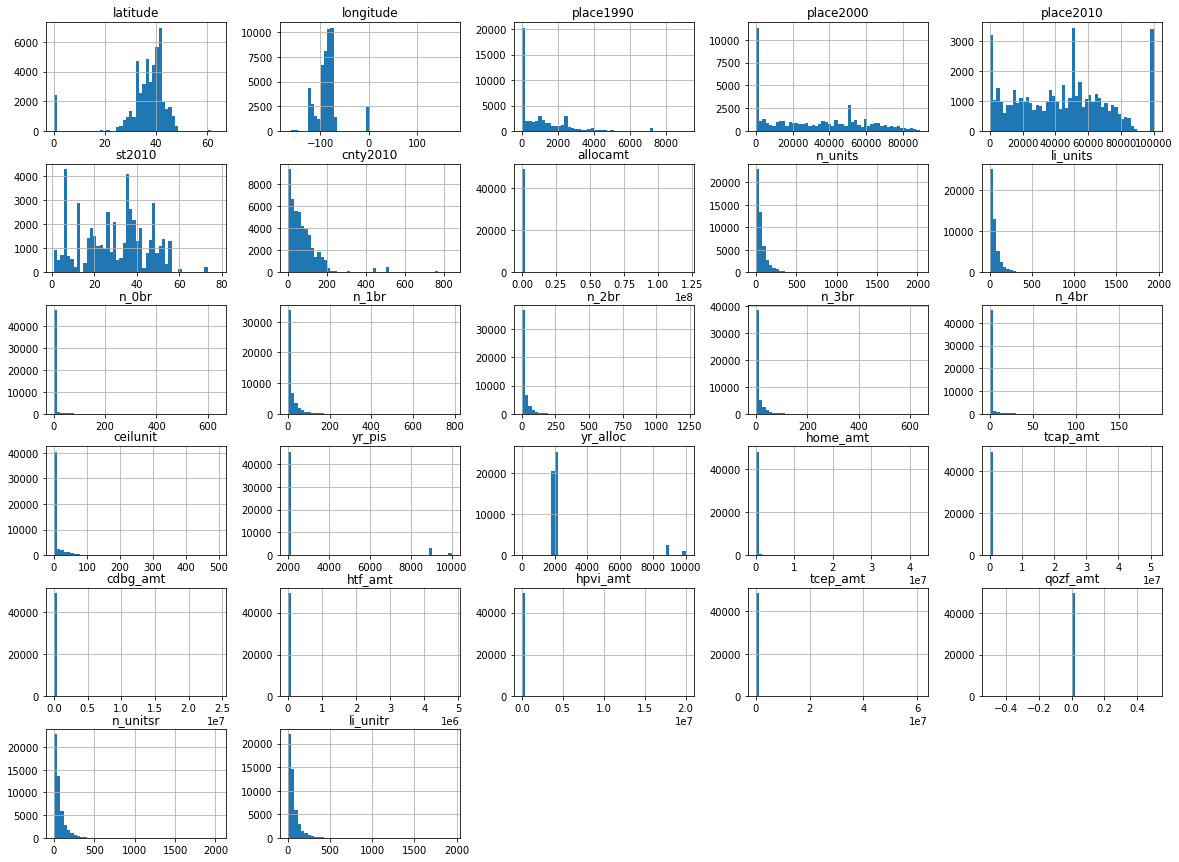

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

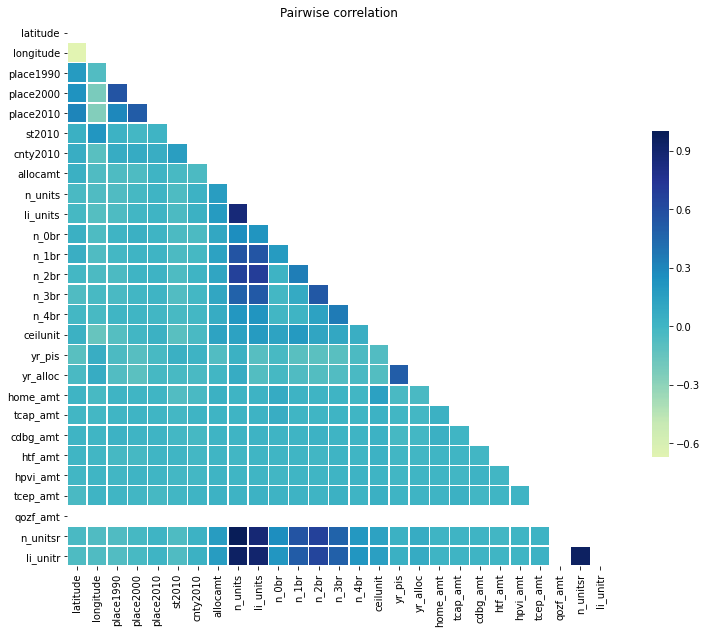

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 10))
g = sns.heatmap(corr, mask=mask, cmap="YlGnBu", center=0, square=True, linewidths=.5,
            cbar_kws={"shrink": 0.6}).set_title('Pairwise correlation')

<AxesSubplot:>

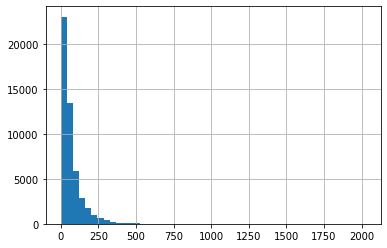

In [ ]:
df.n_units.hist(bins=50)

<AxesSubplot:>

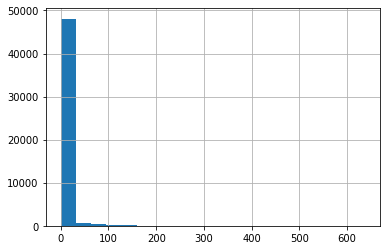

In [ ]:
df.n_0br.hist(bins=20)

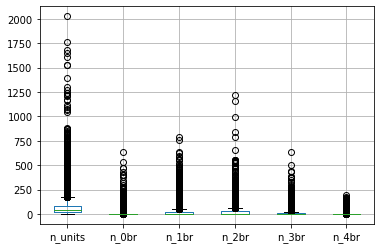

In [ ]:
boxplot = df.boxplot(column=['n_units','n_0br','n_1br','n_2br','n_3br','n_4br'])

<Figure size 720x432 with 0 Axes>

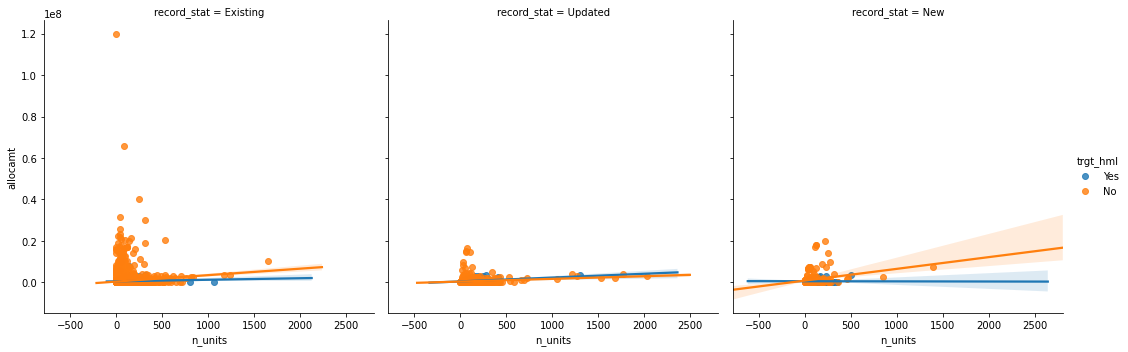

In [ ]:
plt.figure(figsize=(10,6))
sns.lmplot(data=df, y='allocamt',x='n_units', hue="trgt_hml",col="record_stat")

plt.show()

<Figure size 720x432 with 0 Axes>

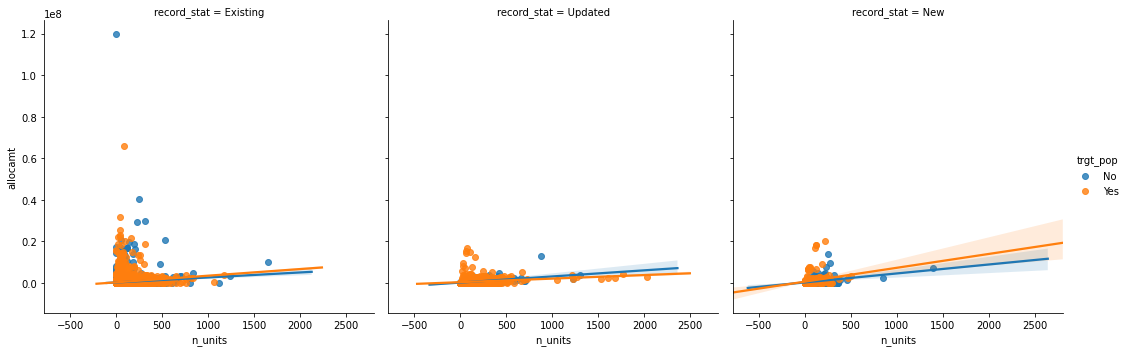

In [ ]:
plt.figure(figsize=(10,6))
sns.lmplot(data=df, y='allocamt',x='n_units', hue="trgt_pop",col="record_stat")

plt.show()

<Figure size 720x432 with 0 Axes>

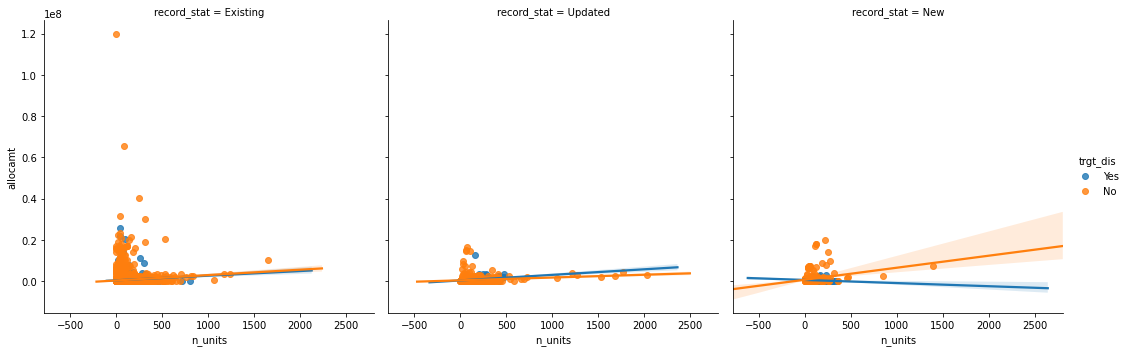

In [ ]:
plt.figure(figsize=(10,6))
sns.lmplot(data=df, y='allocamt',x='n_units', hue="trgt_dis",col="record_stat")

plt.show()

In [ ]:
# add multiple filtering criteria
ts_mask = df.where(df['yr_alloc'] < 3000)
ts_mask = ts_mask.where(df['yr_alloc'] > 1000)

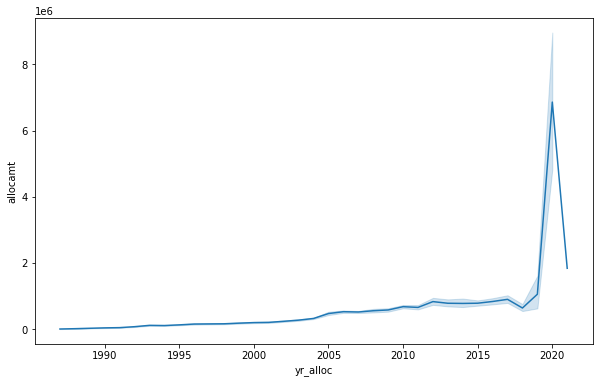

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=ts_mask, x="yr_alloc", y="allocamt")

plt.show()

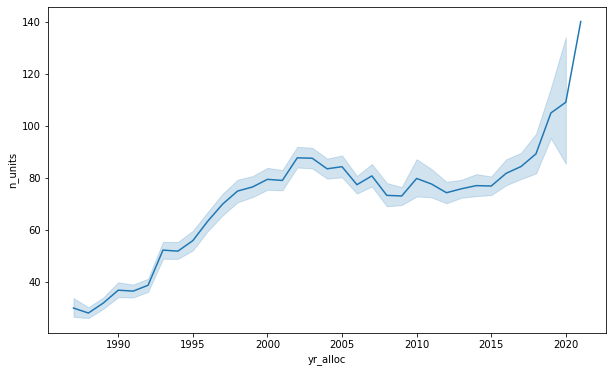

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=ts_mask, x="yr_alloc", y="n_units")

plt.show()

# Variable Selection and Identification

In [ ]:
X = df.drop('allocamt', axis = 1)
y = df.loc[:,'allocamt']

In [ ]:
X

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,...,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason,nlm_spc,datanote,record_stat
0,AKA0000X003,EAGLE RIDGE TOWNHOMES,1775 NORTH THUMA,PALMER,AK,99645,AK-05-23,61,-149,0,...,33,33,Metro/Non-Central City,Not in DDA,None,No,None,NaN,NaN,Existing
1,AKA0000X018,"GATEWAY-SEWARD ASSOCIATES, LTD PTN",1810 PHOENIX ROAD,SEWARD,AK,99664,AK-99-99,60,-149,0,...,20,20,None,Not in DDA,None,No,None,NaN,NaN,Existing
2,AKA0000X022,"JUNEAU AFFORDABLE RENTALS, LLC",SCATTERED SITE,JUNEAU,AK,99801,AK-99-99,58,-134,0,...,25,25,None,Not in DDA,None,No,None,NaN,NaN,Updated
3,AKA0000X024,"MILL BAY TOWNHOMES, LLC",1223 MILL BAY ROAD,KODIAK,AK,99615,AK-99-99,57,-152,0,...,20,20,None,Not in DDA,None,No,None,NaN,NaN,Existing
4,AKA0000X030,TURNAGAIN PLACE APTS,2708 COHO WAY,ANCHORAGE,AK,99517,AK-99-99,61,-149,0,...,29,29,None,Not in DDA,None,No,None,NaN,NaN,Updated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49444,WYA20190001,ALPINE PARK APARTMENTS,111 BOARDWALK DRIVE,ALPINE,WY,83128,WY-99-99,43,-111,0,...,24,24,Metro/Non-Central City,Not in DDA,Not In a Qualified Census Tract,No,None,NaN,NaN,New
49445,WYA20190002,GRAND MESA APARTMENTS (801),501 S. SNYDER AVENUE #100 GRANDMESA@COSTELLOCO...,CHEYENNE,WY,82007,WY-99-99,41,-104,0,...,62,62,Metro/Non-Central City,Not in DDA,In a Qualified Census Tract,No,None,NaN,NaN,New
49446,WYA20190003,GRANITE SPRINGS APARTMENTS,908 E JEFFERSON ST,CHEYENNE,WY,82007,WY-99-99,41,-104,0,...,24,24,Metro/Non-Central City,Not in DDA,Not In a Qualified Census Tract,No,None,NaN,NaN,New
49447,WYA20190004,HAYDEN COMMONS,92 EAST HAYDEN AVENUE,EVANSTON,WY,82930,WY--308,41,-110,0,...,24,23,Metro/Non-Central City,Not in DDA,Not In a Qualified Census Tract,No,None,NaN,NaN,New


In [ ]:
y

0             0
1             0
2             0
3             0
4             0
          ...  
49444         0
49445    873987
49446         0
49447         0
49448         0
Name: allocamt, Length: 49449, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_features = X.columns[X.dtypes == object]
# Label Encoding
for f in cat_features:
    lbl = LabelEncoder()
    lbl.fit(list(X[f].values))
    X[f] = lbl.transform(list(X[f].values))

In [ ]:
X

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,...,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason,nlm_spc,datanote,record_stat
0,0,13222,12738,4428,0,13795,16965,61,-149,0,...,33,33,1,4,2,0,3,31,10547,0
1,1,16131,13141,5326,0,13797,17020,60,-149,0,...,20,20,3,4,2,0,3,31,10547,0
2,2,20707,45431,2871,0,13805,17020,58,-134,0,...,25,25,3,4,2,0,3,31,10547,2
3,3,25543,6107,3008,0,13793,17020,57,-152,0,...,20,20,3,4,2,0,3,31,10547,0
4,4,40103,20993,123,0,13786,17020,61,-149,0,...,29,29,3,4,2,0,3,31,10547,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49444,49444,3488,3958,83,55,11588,44556,43,-111,0,...,24,24,1,4,1,0,3,31,10547,1
49445,49445,16728,32182,1015,55,11548,44556,41,-104,0,...,62,62,1,4,0,0,3,31,10547,1
49446,49446,16819,42745,1015,55,11548,44556,41,-104,0,...,24,24,1,4,1,0,3,31,10547,1
49447,49447,17966,43056,1841,55,11581,44542,41,-110,0,...,24,23,1,4,1,0,3,31,10547,1


# Splitting Training / Test Data

In [ ]:
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# from scipy.misc import comb

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

# Select and Train a Model

In [ ]:
X_train.head()

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,...,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason,nlm_spc,datanote,record_stat
24074,24074,33342,15942,5029,28,5180,32658,32,-90,1115,...,32,31,1,4,1,0,3,31,10547,0
47404,47404,8695,25910,1988,52,13539,2343,47,-124,465,...,30,30,1,2,1,0,3,31,10334,2
35123,35123,24887,748,5351,38,5916,12434,40,-82,3945,...,50,39,1,4,1,0,3,31,10547,0
28475,28475,16900,205,1793,34,10726,8500,40,-73,0,...,270,270,3,4,2,0,3,31,10547,1
31339,31339,36213,31788,4708,37,347,5738,40,-73,2925,...,65,64,1,4,1,0,3,31,10547,0


In [ ]:
y_train.head()

24074      46743
47404     618300
35123     187756
28475    1066870
31339          0
Name: allocamt, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
j = 100
some_sample = X.iloc[j,:]
some_sample = pd.DataFrame(some_sample).T
some_sample

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,...,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason,nlm_spc,datanote,record_stat
100,100,42562,7225,1868,0,13802,16969,64,-147,1080,...,56,56,1,4,1,0,3,31,3027,0


In [ ]:
lin_reg.predict(some_sample)

array([778473.51505095])

In [ ]:
lin_reg.coef_

array([ 7.52546528e+00, -2.46203179e-01,  2.05381133e-01,  5.41269211e+00,
       -3.56174172e+03,  8.77177198e+00, -4.81350683e+00,  6.17526053e+03,
        7.24502290e+02,  1.30338186e+01, -1.88259752e+00,  4.58843910e-01,
       -1.16566257e+01, -7.57604431e+00,  2.14847080e+01, -2.15429003e+03,
       -3.28362867e+02,  2.09231035e+05, -8.38993932e+04,  5.62591160e+02,
        1.97976654e+03,  1.12183247e+03, -3.37510108e+02, -1.88334733e+03,
        1.14415032e+02,  1.86301399e+03, -7.86361771e+04, -3.57003131e+03,
        1.56055765e+03, -1.07178649e+01, -1.11567584e+01,  3.10681864e+04,
        5.18798381e+04,  3.33323667e+04, -5.66259697e+04,  8.38167699e+04,
       -2.27557183e+04,  5.59998780e+03,  2.26483485e+04, -8.16408593e-03,
        4.09271873e+04, -9.15552546e-03, -5.68545037e+04, -6.72747373e-03,
        2.27555729e+05, -3.59694310e-01,  4.54358985e+04, -1.71931253e+05,
        6.67778886e-02, -4.44211181e+03,  2.22523643e-02, -1.57463648e+04,
       -2.40780164e+05,  

In [ ]:
lin_reg.score(X_test,y_test)

0.06591235543462903

In [ ]:
predLinReg = lin_reg.predict(X_test)
predLinReg

array([167956.56116825, 365390.88199707, -50564.05001851, ...,
       -53853.96147623, 313212.04434147, 159140.71391955])

In [ ]:
predLinReg.shape

(12363,)

# Random Forest Regressor

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.33, random_state=1)
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1200 decision trees
#nombre de feuille dans arbre   criterion:mean absolut error
RandoForest = RandomForestRegressor( random_state = 0,n_estimators=700,criterion='mse')

In [ ]:
RandoForest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=700, random_state=0)

In [ ]:
RandoForest.predict(some_sample)

array([594811.58857143])

In [ ]:
RandoForest.score(X_test,y_test)

0.18608727733947417

In [ ]:
RandoForest.feature_importances_

array([8.13464741e-02, 3.05259552e-02, 2.57395837e-02, 1.47512827e-02,
       2.92592922e-03, 3.92949588e-02, 9.96047232e-02, 1.72330197e-02,
       2.36559824e-02, 1.02232977e-02, 7.37314869e-03, 1.38917697e-02,
       7.84860363e-03, 1.42505071e-02, 3.03421441e-02, 3.80365378e-03,
       1.37017713e-02, 2.90062250e-03, 3.88609912e-03, 3.83406947e-02,
       8.13684299e-02, 1.83348752e-02, 1.79552040e-02, 1.16247155e-02,
       9.50170555e-03, 1.01201783e-02, 1.28422972e-02, 4.08634408e-03,
       8.73600149e-03, 6.55514237e-02, 6.14324319e-02, 4.65854012e-03,
       7.66259234e-03, 3.12284847e-03, 1.79638890e-03, 1.57896277e-03,
       1.51199342e-03, 1.01870267e-03, 1.15741824e-03, 1.33987673e-03,
       1.68058876e-03, 1.76277182e-03, 8.02480301e-04, 1.92152876e-04,
       2.05407212e-03, 1.84951325e-06, 1.82711962e-03, 2.15382810e-03,
       1.08904329e-03, 1.09976109e-03, 8.70454225e-03, 8.03880364e-03,
       5.65441885e-03, 0.00000000e+00, 3.79479441e-03, 5.56904410e-03,
      

In [ ]:
 importances = pd.DataFrame({"feature": X_train.columns, "importance": RandoForest.feature_importances_})
 importances.sort_values("importance", ascending=False)[:10]

,feature,importance
6,state_id,0.099605
20,li_units,0.081368
0,hud_id,0.081346
29,yr_pis,0.065551
30,yr_alloc,0.061432
65,li_unitr,0.046235
5,proj_zip,0.039295
19,n_units,0.038341
1,project,0.030526
14,fips2010,0.030342


<AxesSubplot:xlabel='importance', ylabel='feature'>

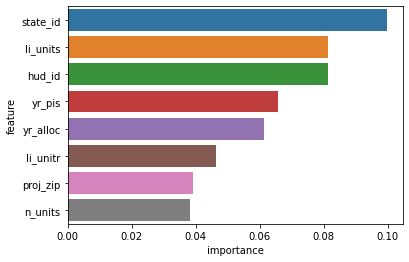

In [ ]:
sns.barplot(data=importances.sort_values("importance", ascending=False).head(8), x="importance", y="feature")

In [ ]:
predForest = RandoForest.predict(X_test)

In [ ]:
lin_mse_forest = mean_squared_error(y_test, predForest)
lin_rmse_forest = np.sqrt(lin_mse_forest)
lin_rmse_forest

1381678.503814605

In [ ]:
lin_mae_forest = mean_absolute_error(y_test, predForest)
lin_mae_forest

182295.68764400686

In [ ]:
lin_mse_lin_reg = mean_squared_error(y_test, predLinReg) 
lin_rmse_lin_reg = np.sqrt(lin_mse_lin_reg)
lin_rmse_lin_reg

1480171.0168952455

In [ ]:
lin_mae_lin_reg = mean_absolute_error(y_test, predLinReg)
lin_mae_lin_reg

323927.6310517331